        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

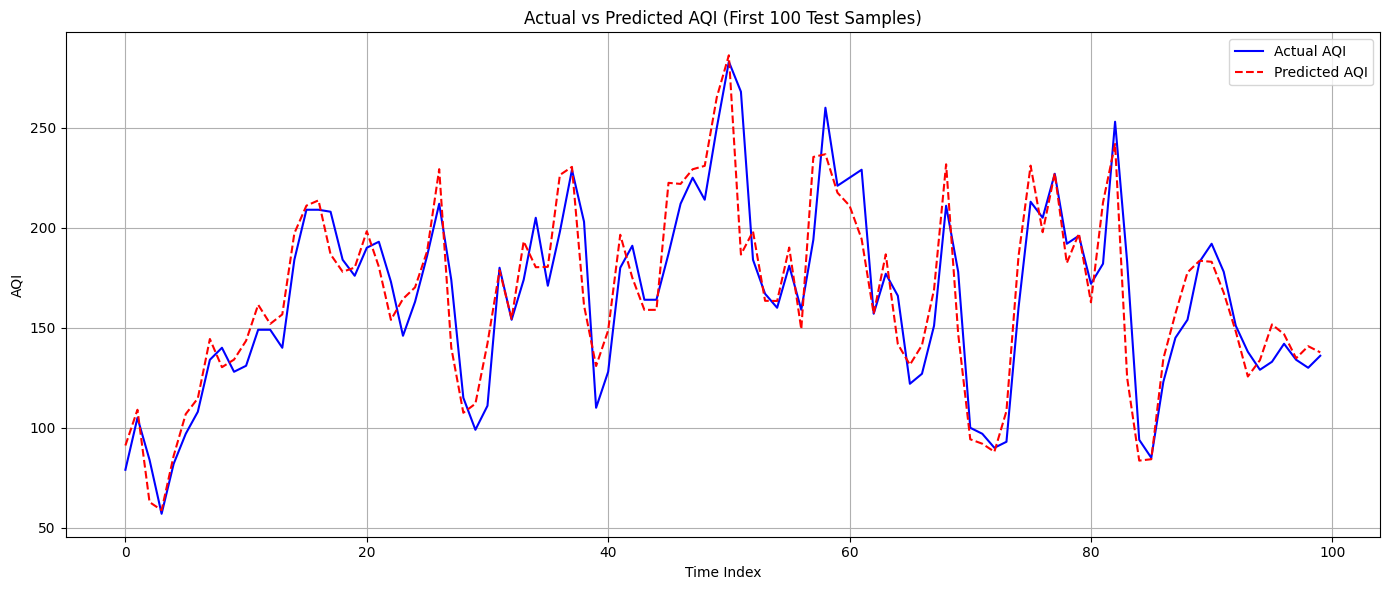

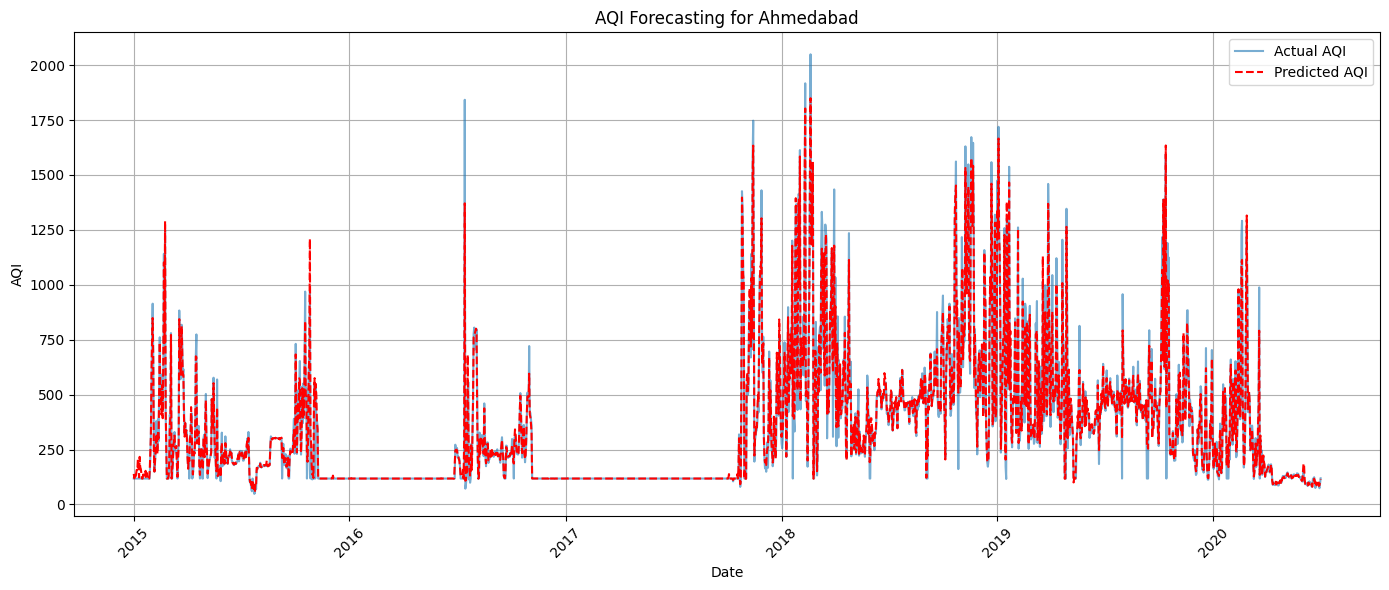

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the dataset
df = pd.read_csv("city_day.csv")

# Step 3: Basic cleaning and exploration
print(df.head())
print(df.info())
print(df.describe())
print("Missing values per column:\n", df.isnull().sum())

# Step 4: Handle missing values
# We'll fill missing numeric values with column-wise median
df.fillna(df.median(numeric_only=True), inplace=True)

# Drop rows with missing target AQI (very few)
df = df.dropna(subset=['AQI'])

# Step 5: Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 6: Feature Engineering
# Extract useful time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Optional: Encode City (Label Encoding)
df['City_Code'] = df['City'].astype('category').cat.codes

# Step 7: Define features and target
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
            'Benzene', 'Toluene', 'Xylene', 'City_Code', 'Year', 'Month', 'Day']
target = 'AQI'

X = df[features]
y = df[target]

# Step 8: Train-test split (city + date-wise sorting for time series split)
df_sorted = df.sort_values(by=['City', 'Date'])
X = df_sorted[features]
y = df_sorted[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 9: Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Predictions and evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 11: Visualize actual vs predicted AQI
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label='Actual AQI', color='blue')
plt.plot(y_pred[:100], label='Predicted AQI', color='red', linestyle='--')
plt.title("Actual vs Predicted AQI (First 100 Test Samples)")
plt.xlabel("Time Index")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 12: Forecasting for a specific city
city_name = "Ahmedabad"
future_df = df[df["City"] == city_name].sort_values("Date")

# Prepare future input features
future_X = future_df[features]
future_pred = model.predict(future_X)

# Step 13: Plot forecast for the city
plt.figure(figsize=(14, 6))
plt.plot(future_df['Date'], future_df['AQI'], label="Actual AQI", alpha=0.6)
plt.plot(future_df['Date'], future_pred, label="Predicted AQI", linestyle='--', color='red')
plt.title(f"AQI Forecasting for {city_name}")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
pip install streamlit pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
